# Time Series Analysis in Python

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [12]:
df = pd.read_csv('airline-passengers.csv', parse_dates=['Month'], index_col='Month')
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


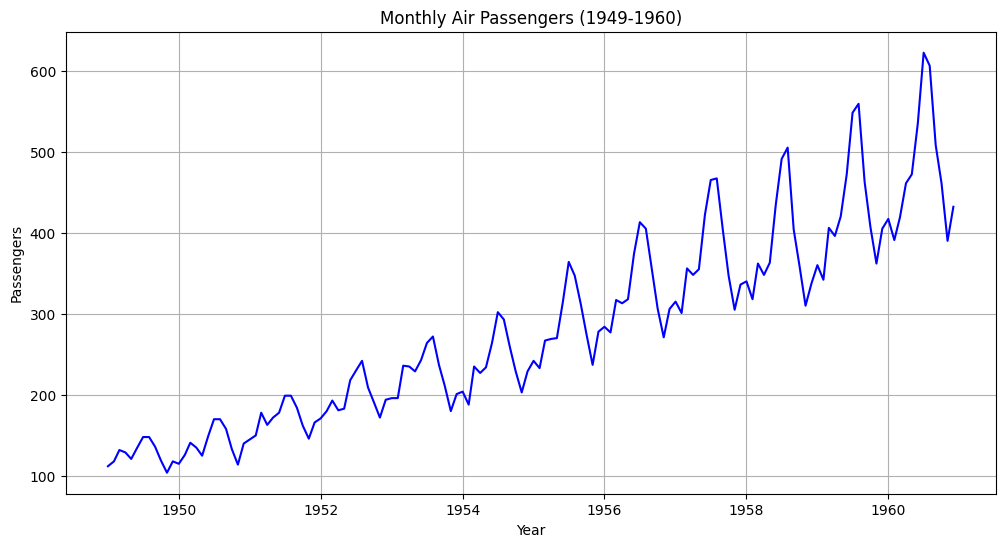

In [13]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Passengers'], color='blue')
plt.title('Monthly Air Passengers (1949-1960)')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

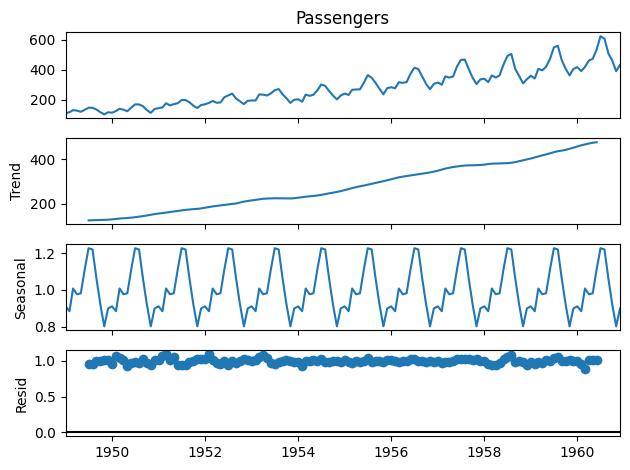

In [14]:
# Decompose into Trend, Seasonal, Residual
decomposition = seasonal_decompose(df['Passengers'], model='multiplicative')

# Plot decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

In [15]:
# Null Hypothesis (H₀): The series is non-stationary.
# p-value < 0.05 → Reject H₀ (stationary)
# Augmented Dickey-Fuller Test,  more ref:https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/
result = adfuller(df['Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] > 0.05:
    print("Series is NOT stationary (p > 0.05)")
else:
    print("Series is stationary (p ≤ 0.05)")

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
Series is NOT stationary (p > 0.05)
